In [677]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np

In [678]:
data = pd.read_excel('combined.xlsx')

In [679]:
data.head(5)

,Apex angle,Base angle,Width(cm),Height(cm),Ratio (H/W),Angle of vain,Leaf
0,140.0,119.0,10.9,17.0,1.559633,71.0,0
1,144.0,103.0,11.7,18.3,1.564103,71.0,0
2,146.0,101.0,10.3,16.9,1.640777,59.0,0
3,144.0,104.0,9.4,14.7,1.563830,61.0,0
4,150.0,126.0,11.0,17.0,1.545455,68.0,0


In [680]:
data.drop(["Width(cm)", "Height(cm)", "Angle of vain"], axis=1, inplace=True)
data.rename(columns={'leaf': 'Leaf'}, inplace=True)

In [681]:
data.head(5)

,Apex angle,Base angle,Ratio (H/W),Leaf
0,140.0,119.0,1.559633,0
1,144.0,103.0,1.564103,0
2,146.0,101.0,1.640777,0
3,144.0,104.0,1.563830,0
4,150.0,126.0,1.545455,0


In [682]:
X = data.drop("Leaf", axis=1)
y = data["Leaf"]

In [683]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Apex angle','Base angle','Ratio (H/W)'])

In [684]:
X.head(5)

,Apex angle,Base angle,Ratio (H/W)
0,0.565217,0.463158,0.762119
1,0.608696,0.294737,0.765386
2,0.630435,0.273684,0.821434
3,0.608696,0.305263,0.765187
4,0.673913,0.536842,0.751754


In [685]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [686]:
X_test.shape

(24, 3)

In [687]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [688]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [689]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 1s 117ms/step - loss: 1.0421 - accuracy: 0.4167 - val_loss: 0.9947 - val_accuracy: 0.6250
Epoch 2/20
3/3 [==============================] - 0s 17ms/step - loss: 0.9084 - accuracy: 0.6354 - val_loss: 0.9119 - val_accuracy: 0.6667
Epoch 3/20
3/3 [==============================] - 0s 18ms/step - loss: 0.8192 - accuracy: 0.6667 - val_loss: 0.8427 - val_accuracy: 0.6667
Epoch 4/20
3/3 [==============================] - 0s 16ms/step - loss: 0.7442 - accuracy: 0.6667 - val_loss: 0.7636 - val_accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 0s 15ms/step - loss: 0.6667 - accuracy: 0.6667 - val_loss: 0.6844 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 0s 14ms/step - loss: 0.6080 - accuracy: 0.6667 - val_loss: 0.6200 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 0s 14ms/step - loss: 0.5591 - accuracy: 0.6667 - val_loss: 0.5612 - val_accuracy: 0.7083
Epoch 8/20
3/3 [==========

In [690]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 64)                256       
                                                                 
 dense_85 (Dense)            (None, 10)                650       
                                                                 
 dense_86 (Dense)            (None, 3)                 33        
                                                                 
Total params: 939
Trainable params: 939
Non-trainable params: 0
_________________________________________________________________


In [691]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 16ms/step - loss: 0.0816 - accuracy: 1.0000
Test Accuracy: 1.0


In [692]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 45ms/step


In [693]:
predicted_classes = np.argmax(y_pred, axis=1)

In [694]:
print(predicted_classes)

[1 1 0 1 0 1 1 0 1 2 0 1 0 0 2 2 2 0 2 2 1 1 0 1]


In [695]:
print(y_test)

44     1
47     1
4      0
55     1
26     0
64     1
73     1
10     0
40     1
107    2
18     0
62     1
11     0
36     0
89     2
91     2
109    2
0      0
88     2
104    2
65     1
45     1
31     0
70     1
Name: Leaf, dtype: int64


In [696]:
#precision

In [697]:
predicted_classes = np.argmax(y_pred, axis=1)
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, predicted_classes)
precision_result = precision.result().numpy()
print(f'Precision: {precision_result:.4f}')

Precision: 1.0000


In [698]:
# Recall

In [699]:
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, predicted_classes)
recall_result = recall.result().numpy()
print(f'Recall: {recall_result:.4f}')

Recall: 1.0000


<Axes: >

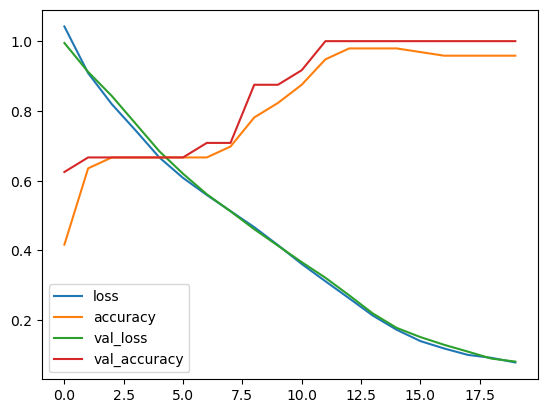

In [700]:
pd.DataFrame(history.history).plot()

In [701]:
new_data = pd.DataFrame({
    'Apex angle': [103],
    'Base angle': [141],
    'Ratio (H/W)': [1.60],  
})

In [702]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=['Apex angle', 'Base angle', 'Ratio (H/W)'])

In [703]:
new_predictions = model.predict(new_data_scaled_df)
predicted_class = np.argmax(new_predictions)

1/1 [==============================] - 0s 14ms/step


In [704]:
if predicted_class == 0:
    print("Predicted leaf type: Jack tree")
elif predicted_class == 1:
    print("Predicted leaf type: Chesaw tree")
else:
    print("Predicted leaf type: Banyan tree")

Predicted leaf type: Banyan tree
